In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [3]:
# import data
data = pd.read_csv("./HR_comma_sep.csv")

In [4]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [7]:
from sklearn import model_selection, preprocessing
for salary in data.columns:
    if data[salary].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(data[salary].values)) 
        data[salary] = lbl.transform(list(data[salary].values))

In [8]:
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn import metrics

y = data['left']
X = data.drop(['left','sales'], axis = 1)

In [9]:
X.shape

(14999, 8)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null int64
dtypes: float64(2), int64(6)
memory usage: 937.5 KB


In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=5)

C:\Users\NutanMandale\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


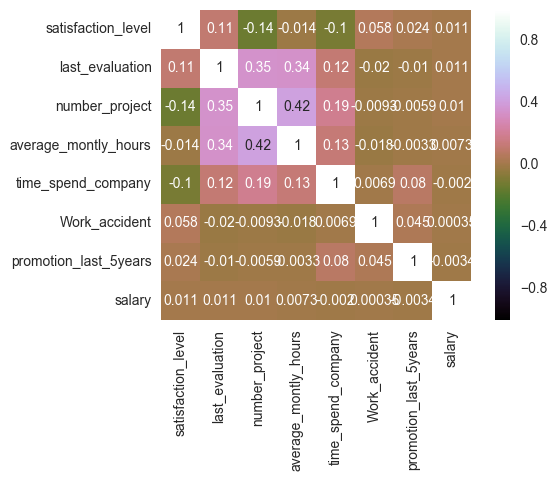

In [12]:
corr_mat=X_train.corr()
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix');

### Logistic Regression

In [13]:
lr = LogisticRegression(C=1e9)
fit = lr.fit(X_train, y_train)

In [14]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [15]:
# Display.
print('Coefficients:')
print(fit.coef_)
print('Intercept:')
print(fit.intercept_)
pred_y_lr = lr.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_lr, y))
print("\nAccuracy on training set:") 
print(lr.score(X_train, y_train))
print("\nAccuracy on test set:")
print(lr.score(X_test, y_test))
#print("\nRMSE of test set:" )
#print(np.sqrt(metrics.mean_squared_error(y_test, pred_y_sklearn)))
print('\nRMSE of test set: %.3f' % (np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr))) )


print('\n Score')
print(lr.score(X, y))

Coefficients:
[[ -4.23285361e+00   8.35781568e-01  -3.25247483e-01   4.53471594e-03
    2.23869026e-01  -1.56037122e+00  -1.64241708e+00   9.40368050e-04]]
Intercept:
[ 0.25743584]

 Accuracy
left       0     1
row_0             
0      10577  2667
1        851   904

Accuracy on training set:
0.769579518179

Accuracy on test set:
0.753066666667

RMSE of test set: 0.497

 Score
0.765451030069


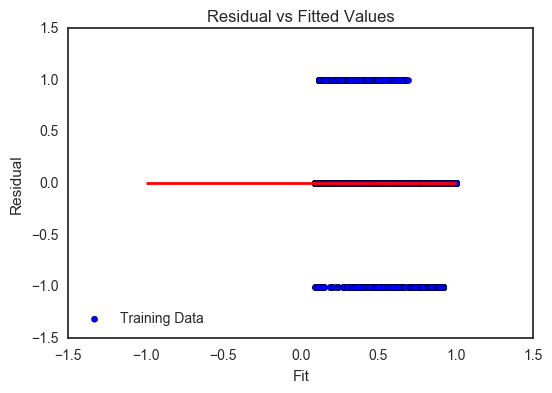

In [18]:
# Visualize
plt.scatter(X_train['satisfaction_level'], y_train_pred_lr - y_train, c='blue', marker='o', label='Training Data')
#plt.scatter(y_test_pred_lr, y_test_pred_lr - y_test, c='yellow', marker='s', label='Test data')
plt.hlines(y=0, xmin=-1, xmax=1, lw=2, color='red')
plt.xlabel('Fit')
plt.ylabel('Residual')
plt.legend(loc='lower left')
plt.title('Residual vs Fitted Values');

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y,pred_y_lr))

             precision    recall  f1-score   support

          0       0.80      0.93      0.86     11428
          1       0.52      0.25      0.34      3571

avg / total       0.73      0.77      0.73     14999



In [20]:
cnfsn_mtrx = metrics.confusion_matrix(y_test, y_test_pred_lr)

In [32]:
print(y_test_pred_lr)

[0 0 1 ..., 0 0 0]


In [21]:
print(cnfsn_mtrx)

[[2600  231]
 [ 695  224]]


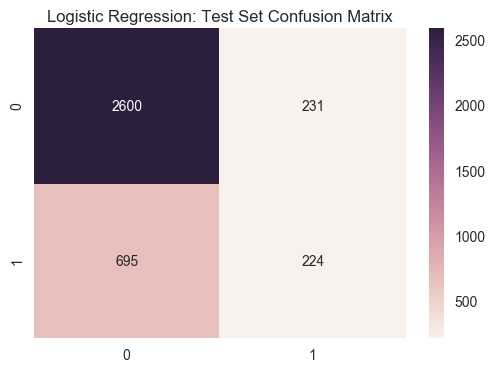

In [22]:
# Display heatmap of confusion matrix
_ = sns.heatmap(cnfsn_mtrx, annot=True, fmt="d")
_ = plt.title("Logistic Regression: Test Set Confusion Matrix");

### Ridge Regression

In [23]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_train, y_train))
y_train_pred_ridge = ridgeregr.predict(X_train)
y_test_pred_ridge = ridgeregr.predict(X_test)

0.165390796184


In [24]:
# Display.
print('Coefficients:')
print(fit.coef_)
print('Intercept:')
print(fit.intercept_)
pred_y_ridge = ridgeregr.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_ridge, y))
print("\nAccuracy on training set:") 
print(ridgeregr.score(X_train, y_train))
print("\nAccuracy on test set:")
print(ridgeregr.score(X_test, y_test))
print('\nRMSE of test set: %.3f' % (np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ridge))) )

Coefficients:
[[ -4.23285361e+00   8.35781568e-01  -3.25247483e-01   4.53471594e-03
    2.23869026e-01  -1.56037122e+00  -1.64241708e+00   9.40368050e-04]]
Intercept:
[ 0.25743584]

 Accuracy
left       0  1
row_0          
-0.336879  1  0
-0.294738  1  0
-0.291281  1  0
-0.290427  1  0
-0.289145  1  0
-0.282277  1  0
-0.281998  1  0
-0.280577  1  0
-0.277833  1  0
-0.277439  1  0
-0.275993  1  0
-0.271784  1  0
-0.267296  1  0
-0.265407  1  0
-0.264643  1  0
-0.263160  1  0
-0.261226  2  0
-0.255669  1  0
-0.255216  1  0
-0.251000  1  0
-0.249977  1  0
-0.248204  1  0
-0.247999  1  0
-0.247569  1  0
-0.245634  1  0
-0.245531  1  0
-0.244713  1  0
-0.242938  1  0
-0.242155  1  0
-0.240538  2  0
...       .. ..
 0.718192  2  0
 0.718306  1  0
 0.718890  0  1
 0.719162  2  0
 0.719913  0  3
 0.720189  0  1
 0.721477  0  2
 0.723589  0  2
 0.723923  2  0
 0.726811  0  3
 0.728026  2  0
 0.730673  0  3
 0.731903  2  0
 0.732123  1  0
 0.734166  0  1
 0.734291  1  0
 0.735879  1  0
 0.73590

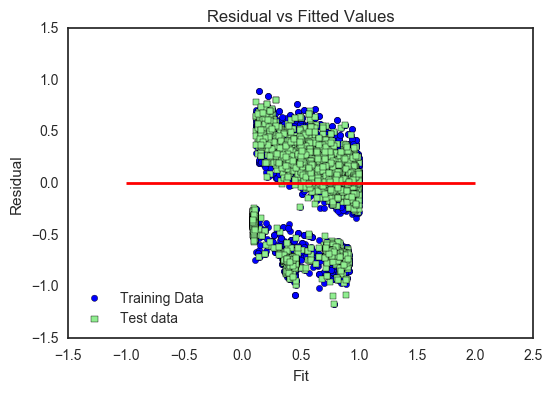

In [28]:
# Visualize
plt.scatter(X_train['satisfaction_level'], y_train_pred_ridge - y_train, c='blue', marker='o', label='Training Data')
plt.scatter(X_test['satisfaction_level'], y_test_pred_ridge - y_test, c='lightgreen', marker='s', label='Test data')
plt.hlines(y=0, xmin=-1, xmax=2, lw=2, color='red')
plt.xlabel('Fit')
plt.ylabel('Residual')
plt.legend(loc='lower left')
plt.title('Residual vs Fitted Values');

### LASSO Regression

In [38]:
lass = linear_model.Lasso(alpha=1)
lassfit = lass.fit(X_train, y_train)
print('R² for the model with few features:')
print(lass.score(X_train, y_train))

y_train_lass = lass.predict(X_train)
y_test_lass = lass.predict(X_test)

print("\nAccuracy on training set:") 
print(lass.score(X_train, y_train))
print("\nAccuracy on test set:")
print(lass.score(X_test, y_test))

origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

R² for the model with few features:
0.00312776643549

Accuracy on training set:
0.00312776643549

Accuracy on test set:
0.00224552741106

Parameter estimates for the model with few features:
[-0.         -0.          0.          0.00022092  0.         -0.         -0.
 -0.          0.1913273 ]


In [39]:
print(y_test_lass)

[ 0.22247735  0.24324405  0.25782492 ...,  0.21319861  0.24390681
  0.22358196]


In [40]:
print(y_test)

184      1
1126     1
942      1
11865    0
5265     0
13763    0
5871     0
3557     0
9687     0
4706     0
3414     0
11316    0
12084    1
1896     1
14847    1
11639    0
9185     0
75       1
4504     0
4276     0
14290    1
4281     0
2834     0
10258    0
1213     1
11101    0
6550     0
2056     0
13512    0
2621     0
        ..
12590    1
5924     0
7387     0
11684    0
3755     0
7030     0
3270     0
10918    0
9773     0
8932     0
73       1
9264     0
3531     0
3003     0
421      1
4033     0
2549     0
11989    0
3950     0
1599     1
5290     0
7843     0
1036     1
13118    0
358      1
195      1
10900    0
3039     0
11405    0
3200     0
Name: left, dtype: int64


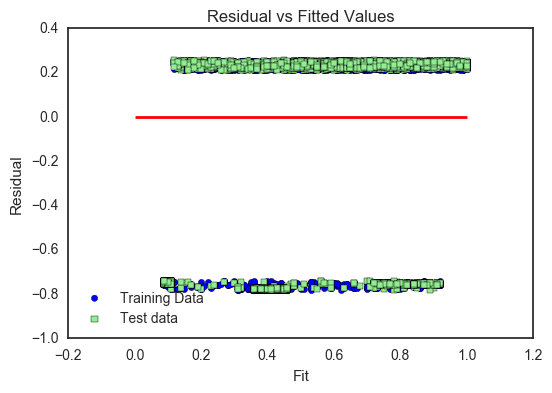

In [42]:
# Visualize
plt.scatter(X_train['satisfaction_level'], y_train_lass - y_train, c='blue', marker='o', label='Training Data')
plt.scatter(X_test['satisfaction_level'], y_test_lass - y_test, c='lightgreen', marker='s', label='Test data')
plt.hlines(y=0, xmin=0, xmax=1, lw=2, color='red')
plt.xlabel('Fit')
plt.ylabel('Residual')
plt.legend(loc='lower left')
plt.title('Residual vs Fitted Values');